### Stock Market Prediction And Forecasting Using Stacked LSTM

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('AAPL.csv')

In [12]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [13]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [14]:
df1=df.reset_index()['close']

In [15]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

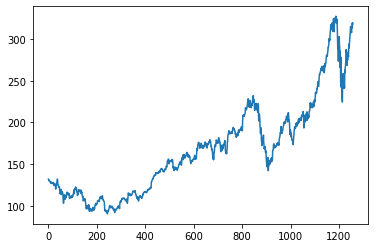

In [17]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.show()

In [18]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [21]:
import numpy as np

In [22]:
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(817, 441)

In [29]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [30]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [31]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [32]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [33]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [34]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
12/12 [==============================] - 9s 328ms/step - loss: 0.0307 - val_loss: 0.0482
Epoch 2/10
12/12 [==============================] - 2s 162ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 3/10
12/12 [==============================] - 2s 144ms/step - loss: 0.0014 - val_loss: 0.0043
Epoch 4/10
12/12 [==============================] - 2s 150ms/step - loss: 8.5091e-04 - val_loss: 0.0044
Epoch 5/10
12/12 [==============================] - 2s 135ms/step - loss: 6.8193e-04 - val_loss: 0.0060
Epoch 6/10
12/12 [==============================] - 2s 140ms/step - loss: 6.9700e-04 - val_loss: 0.0045
Epoch 7/10
12/12 [==============================] - 2s 153ms/step - loss: 6.4723e-04 - val_loss: 0.0045
Epoch 8/10
12/12 [==============================] - 2s 158ms/step - loss: 6.5460e-04 - val_loss: 0.0040
Epoch 9/10
12/12 [==============================] - 2s 138ms/step - loss: 6.2601e-04 - val_loss: 0.0035
Epoch 10/10
12/12 [==============================] - 2s 154ms/step - loss: 5

In [38]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [39]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [42]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train,train_predict))

142.94021910333848

In [43]:
### Test Data RMSE
np.sqrt(mean_squared_error(ytest,test_predict))

236.45730416241676

In [53]:
def createList(r1, r2): 
    return [item for item in range(r1, r2+1)] 

In [61]:
index = createList(917 , 1262)

In [62]:
test_predict = pd.DataFrame(test_predict , index = index)

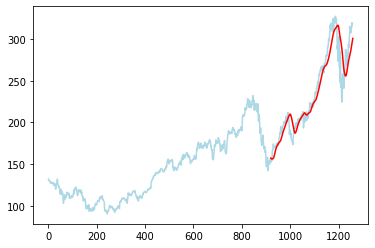

In [66]:
plt.plot(scaler.inverse_transform(df1), color = 'lightblue')
plt.plot(test_predict ,color = 'red')
plt.show()